In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load 
file_to_load = 'Data Sets/Latest Netflix data with 26+ joined attributes/netflix-rotten-tomatoes-metacritic-imdb.csv'
netflix_metacritic = pd.read_csv(file_to_load)

In [17]:
netflix_metacritic.head()
netflix_metacritic_subset = netflix_metacritic[['Title','Genre','Languages','Country Availability','Director']]
netflix_metacritic_subset.columns = ['Title','Genre','Languages','Country','Director']

netflix_country_split = netflix_metacritic_subset.Country.str.split(',')
series = netflix_country_split.apply(pd.Series, 1)
stacked = series.stack()
drop = stacked.index = stacked.index.droplevel(-1)
df = pd.DataFrame(stacked)
df = df.join(netflix_metacritic_subset)
del df['Country']
df.columns = ['Country','Title','Genre','Languages','Director']
df = df.reset_index(drop=True)
df.to_csv('Netflix_by_Country.csv', index = False)
df

,Country,Title,Genre,Languages,Director
0,Thailand,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Tomas Alfredson
1,Canada,HOW TO BUILD A GIRL,Comedy,English,Coky Giedroyc
2,Canada,Centigrade,"Drama, Thriller",English,Brendan Walsh
3,Belgium,ANNE+,Drama,Turkish,NaN
4,Netherlands,ANNE+,Drama,Turkish,NaN
...,...,...,...,...,...
195580,Brazil,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN
195581,Netherlands,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN
195582,Italy,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN
195583,Israel,DreamWorks Kung Fu Panda Awesome Secrets,"Animation, Action, Comedy, Family",English,NaN


In [60]:
title_count = df.groupby(['Country']).count()
title_count

,Title,Genre,Languages,Director
Country,,,,
Argentina,5138,4812,4644,3278
Australia,5820,5388,5200,3672
Belgium,5437,5062,4906,3448
Brazil,5057,4709,4551,3189
Canada,5930,5510,5326,3853
Colombia,4867,4560,4401,3051
Czech Republic,6237,5706,5537,4047
France,5194,4821,4668,3223
Germany,5539,5101,4942,3489


In [57]:
netflix_genre_split = df.Genre.str.split(',')
genre_series = netflix_genre_split.apply(pd.Series, 1)
genre_stacked = genre_series.stack()
drop = genre_stacked.index = genre_stacked.index.droplevel(-1)
genre_df = pd.DataFrame(genre_stacked)
genre_df = genre_df.join(df)
del genre_df['Title']
del genre_df['Director']
del genre_df['Genre']
genre_df.columns = ['Genre','Country','Languages']
genre_df = genre_df.reset_index(drop=True)
# df.to_csv('Netflix_by_Country.csv', index = False)
genre_df

,Genre,Country,Languages
0,Crime,Thailand,"Swedish, Spanish"
1,Drama,Thailand,"Swedish, Spanish"
2,Fantasy,Thailand,"Swedish, Spanish"
3,Horror,Thailand,"Swedish, Spanish"
4,Romance,Thailand,"Swedish, Spanish"
...,...,...,...
454057,Family,Israel,English
454058,Animation,Colombia,English
454059,Action,Colombia,English
454060,Comedy,Colombia,English


In [32]:
genre_df.groupby(['Country']).describe()

Genre                      Languages                      
                count unique     top  freq     count unique      top  freq
Country                                                                   
Argentina       12234     52   Drama  1277     11865    554  English  5246
Australia       13294     53   Drama  1399     12896    605  English  5731
Belgium         13085     52   Drama  1382     12728    615  English  5601
Brazil          11935     51   Drama  1234     11576    541  English  5119
Canada          13687     52   Drama  1451     13292    623  English  5963
Colombia        11882     52   Drama  1271     11524    550  English  5003
Czech Republic  14057     53   Drama  1523     13682    674  English  5715
France          12339     52   Drama  1276     11997    576  English  5154
Germany         13050     52   Drama  1411     12693    622  English  5304
Greece          12033     52  Comedy  1298     11683    584  English  4895
Hong Kong       12367     52   Drama  1293     12028    580  English  5105
Hungary         13595     52   Drama  1463     13218    655  English  5564
Iceland         11889     52   Drama  1283     11522    542  English  4737
India           13245     52   Drama  1440     12855    603  English  5227
Israel          11884     52  Comedy  1268     11528    545  English  4795
Italy           12225     52   Drama  1311     11881    584  English  5175
Japan           14404     51   Drama  1480     14044    601  English  4955
Lithuania       12264     52  Comedy  1370     11891    571  English  4888
Malaysia        12693     53   Drama  1352     12332    589  English  4785
Mexico          12232     52   Drama  1273     11863    549  English  5261
Netherlands     11903     52   Drama  1263     11559    565  English  5163
Poland          11930     52  Comedy  1250     11588    573  English  5254
Portugal        11058     52   Drama  1147     10727    507  English  4753
Romania         13168     52   Drama  1429     12807    643  English  5440
Russia          12225     52  Comedy  1344     11858    558  English  4818
Singapore       13475     53   Drama  1419     13102    624  English  5192
Slovakia        13185     53   Drama  1447     12814    631  English  5332
South Africa    12452     53  Comedy  1365     12071    568  English  5116
South Korea     11894     51   Drama  1226     11563    573  English  4929
Spain           11791     52   Drama  1223     11450    550  English  4947
Sweden          11374     52   Drama  1191     11036    537  English  4998
Switzerland     13191     52   Drama  1384     12846    618  English  5561
Thailand        13478     52   Drama  1408     13101    607  English  5185
Turkey          11435     52   Drama  1193     11099    537  English  4979
United Kingdom  14329     53  Comedy  1556     13928    632  English  6225
United States   12780     52   Drama  1357     12375    540  English  5615

In [69]:
horror_df = genre_df.loc[genre_df["Genre"]=="Horror"]
horror_count = horror_df.groupby(['Country']).count()

In [70]:
comedy_df = genre_df.loc[genre_df["Genre"]=="Comedy"]
comedy_count = comedy_df.groupby(['Country']).count()

In [150]:
doc_df = genre_df.loc[genre_df["Genre"]=="Documentary"]
doc_count = doc_df.groupby(['Country']).count()

In [254]:
drama_df = genre_df.loc[genre_df["Genre"]=="Drama"]
drama_count = drama_df.groupby(['Country']).count()

In [255]:
romance_df = genre_df.loc[genre_df["Genre"]=="Romance"]
romance_count = romance_df.groupby(['Country']).count()

In [256]:
total_horror_df = pd.merge(title_count,horror_count,how='outer',on='Country',suffixes=("_Total","_Horror"))
del total_horror_df["Languages_Total"]
del total_horror_df['Director']
del total_horror_df['Languages_Horror']
horror_comedy_df = pd.merge(total_horror_df,comedy_count,how='outer',on='Country')
del horror_comedy_df["Languages"]
horror_comedy_df.columns = ['Title_Count','Genre_Count','Horror_Count','Comedy_Count']
del horror_comedy_df["Genre_Count"]
horror_percent = horror_comedy_df['Horror_Count']/horror_comedy_df['Title_Count']*100
horror_comedy_df["Horror_Percent"] = round(horror_percent,2)
comedy_percent = horror_comedy_df['Comedy_Count']/horror_comedy_df['Title_Count']*100
horror_comedy_df["Comedy_Percent"] = round(comedy_percent,2)

In [259]:
genre_data_df1 = pd.merge(horror_comedy_df,doc_count,how='outer',on='Country')
del genre_data_df1["Languages"]
genre_data_df1.columns = ['Title_Count','Horror_Count','Comedy_Count','Horror_Percent','Comedy_Percent','Doc_Count']
doc_percent = genre_data_df1['Doc_Count']/genre_data_df1['Title_Count']*100
genre_data_df1["Doc_Percent"] = round(doc_percent,2)

genre_data_df2 = pd.merge(genre_data_df1,drama_count,how='outer',on='Country')
del genre_data_df2['Languages']
genre_data_df = pd.merge(genre_data_df2,romance_count,how='outer',on='Country')
del genre_data_df['Languages']
genre_data_df.columns = ['Title_Count','Horror_Count','Comedy_Count','Horror_Percent','Comedy_Percent','Doc_Count','Doc_Percent','Drama_Count','Romance_Count']
drama_percent = genre_data_df['Drama_Count']/genre_data_df['Title_Count']*100
genre_data_df["Drama_Percent"] = round(drama_percent,2)
romance_percent = genre_data_df['Romance_Count']/genre_data_df['Title_Count']*100
genre_data_df["Romance_Percent"] = round(romance_percent,2)

genre_data_df

,Title_Count,Horror_Count,Comedy_Count,Horror_Percent,Comedy_Percent,Doc_Count,Doc_Percent,Drama_Count,Romance_Count,Drama_Percent,Romance_Percent
Country,,,,,,,,,,,
Argentina,5138,93,1222,1.81,23.78,598,11.64,791,31,15.40,0.60
Australia,5820,102,1377,1.75,23.66,643,11.05,951,57,16.34,0.98
Belgium,5437,90,1299,1.66,23.89,585,10.76,795,28,14.62,0.51
Brazil,5057,93,1174,1.84,23.22,589,11.65,781,31,15.44,0.61
Canada,5930,111,1376,1.87,23.20,660,11.13,954,47,16.09,0.79
Colombia,4867,93,1045,1.91,21.47,557,11.44,785,31,16.13,0.64
Czech Republic,6237,111,1522,1.78,24.40,651,10.44,1011,57,16.21,0.91
France,5194,81,1250,1.56,24.07,576,11.09,798,25,15.36,0.48
Germany,5539,101,1335,1.82,24.10,587,10.60,818,34,14.77,0.61


In [4]:
# File to Load 
file_to_load_two = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixRevenue2020_V2.csv'
netflix_subscribers_country= pd.read_csv(file_to_load_two)

In [78]:
netflix_subscribers_country.head()
netflix_rev_region = netflix_subscribers_country.groupby(['Area','Years']).sum('Subscribers')
# netflix_rev_region

In [6]:
# File to Load 
file_to_load_three = 'Data Sets/Netflix Subscribers and Revenue by Country/DataNetflixSubscriber2020_V2.csv'
netflix_subscribers_revenue = pd.read_csv(file_to_load_three)

In [79]:
netflix_subscribers_revenue.head()

netflix_subs_region = netflix_subscribers_revenue.groupby(['Area','Years']).sum('Subscribers')
# netflix_subs_region

In [8]:
# File to Load 
file_to_load_four = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixsRevenue2018toQ2_2020.csv'
Netflix_revenue_country = pd.read_csv(file_to_load_four)

In [80]:
# Netflix_revenue_country 

In [10]:
# File to Load 
file_to_load_five = 'Data Sets/Netflix Subscribers and Revenue by Country/NetflixSubscribersbyCountryfrom2018toQ2_2020.csv'
netflix_subscribers_country_v = pd.read_csv(file_to_load_five)

In [81]:
# netflix_subscribers_country_v.head()

In [12]:
# File to Load 
file_to_load_h = 'Data Sets/World Happiness Report/world-happiness-report-2021.csv'
world_happiness_report = pd.read_csv(file_to_load_h)

In [52]:
world_happiness_report.head()
world_happiness_report_sub = world_happiness_report[['Country name','Regional indicator','Ladder score']]
world_happiness_report_sub.columns = ['Country','Region','Ladder Score']
# world_happiness_report_sub['Region'].unique()
world_happiness_report_sub

,Country,Region,Ladder Score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464
...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512
145,Botswana,Sub-Saharan Africa,3.467
146,Rwanda,Sub-Saharan Africa,3.415
147,Zimbabwe,Sub-Saharan Africa,3.145


In [14]:
# File to Load 
file_to_load_r = 'Data Sets/World Happiness Report/world-happiness-report.csv'
world_happiness_report_t= pd.read_csv(file_to_load_r)

In [187]:
china = world_happiness_report_sub.loc[world_happiness_report_sub["Country"]=="China"]
china

,Country,Region,Ladder Score
83,China,East Asia,5.339


In [260]:
happiness_genre_df = pd.merge(genre_data_df,world_happiness_report_sub,how='left',on='Country')
del happiness_genre_df['Region']
happiness_genre_df.dropna(inplace=True)
# happiness_genre_df["Ladder Score"] = world_happiness_report_sub["Ladder Score"].fillna(value=0)
happiness_genre_df

,Country,Title_Count,Horror_Count,Comedy_Count,Horror_Percent,Comedy_Percent,Doc_Count,Doc_Percent,Drama_Count,Romance_Count,Drama_Percent,Romance_Percent,Ladder Score
0,Argentina,5138,93,1222,1.81,23.78,598,11.64,791,31,15.40,0.60,5.929
1,Australia,5820,102,1377,1.75,23.66,643,11.05,951,57,16.34,0.98,7.183
2,Belgium,5437,90,1299,1.66,23.89,585,10.76,795,28,14.62,0.51,6.834
3,Brazil,5057,93,1174,1.84,23.22,589,11.65,781,31,15.44,0.61,6.330
4,Canada,5930,111,1376,1.87,23.20,660,11.13,954,47,16.09,0.79,7.103
5,Colombia,4867,93,1045,1.91,21.47,557,11.44,785,31,16.13,0.64,6.012
6,Czech Republic,6237,111,1522,1.78,24.40,651,10.44,1011,57,16.21,0.91,6.965
7,France,5194,81,1250,1.56,24.07,576,11.09,798,25,15.36,0.48,6.690
8,Germany,5539,101,1335,1.82,24.10,587,10.60,818,34,14.77,0.61,7.155
9,Greece,5324,95,1298,1.78,24.38,599,11.25,891,52,16.74,0.98,5.723


In [161]:
import matplotlib.pyplot as plt

Text(3.9, 23.8, 'India')

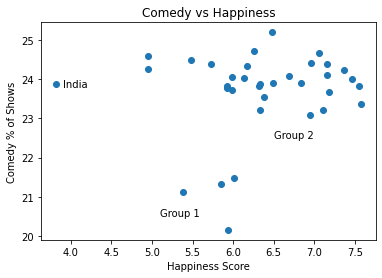

In [216]:
plt.scatter(happiness_genre_df["Ladder Score"],happiness_genre_df["Comedy_Percent"])
plt.xlabel("Happiness Score")
plt.ylabel("Comedy % of Shows")
plt.title("Comedy vs Happiness")
plt.annotate("Group 2",(6.5,22.5))
plt.annotate("Group 1",(5.1,20.5))
plt.annotate("India",(3.9,23.8))

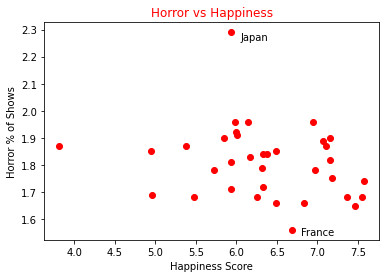

In [289]:
plt.scatter(happiness_genre_df["Ladder Score"],happiness_genre_df["Horror_Percent"],color="red")
plt.xlabel("Happiness Score")
plt.ylabel("Horror % of Shows")
plt.title("Horror vs Happiness",color="red")
plt.annotate("Japan",(6.05,2.26))
plt.annotate("France",(6.8,1.54))

plt.savefig("horror.png")

In [235]:
group_1 = happiness_genre_df.loc[happiness_genre_df['Comedy_Percent']<22]
group_1_avg = group_1["Ladder Score"].mean()
group_1_avg
group_1

,Country,Title_Count,Horror_Count,Comedy_Count,Horror_Percent,Comedy_Percent,Doc_Count,Doc_Percent,Ladder Score
5,Colombia,4867,93,1045,1.91,21.47,557,11.44,6.012
16,Japan,6115,140,1233,2.29,20.16,565,9.24,5.940
18,Malaysia,5394,101,1139,1.87,21.12,531,9.84,5.384
28,South Korea,4845,92,1034,1.90,21.34,517,10.67,5.845


In [219]:
group_2_india = happiness_genre_df.loc[happiness_genre_df['Comedy_Percent']>22]
group_2 = group_2_india.loc[group_2_india['Ladder Score']>4]
group_2_avg = group_2["Ladder Score"].mean()
group_2_avg

6.496099999999999

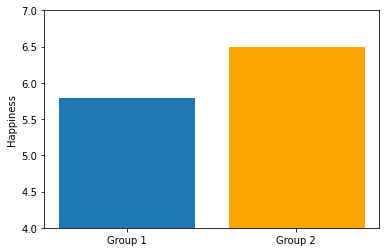

In [280]:
x_axis = np.arange(0,2,1)
plt.bar(x_axis,[group_1_avg,group_2_avg])[1].set_color('orange')
tick_loc = x_axis
labels = ["Group 1","Group 2"]
plt.xticks(tick_loc,labels)
plt.ylim(4,7)
plt.ylabel("Happiness")

plt.savefig("comedy_bar.png")

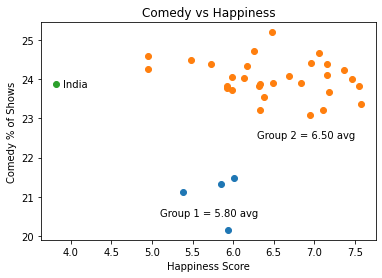

In [266]:
plt.scatter(group_1["Ladder Score"],group_1["Comedy_Percent"])
plt.scatter(group_2["Ladder Score"],group_2["Comedy_Percent"])
plt.scatter(3.819,23.88)

plt.xlabel("Happiness Score")
plt.ylabel("Comedy % of Shows")
plt.title("Comedy vs Happiness")

plt.annotate("Group 2 = 6.50 avg",(6.3,22.5))
plt.annotate("Group 1 = 5.80 avg",(5.1,20.5))
plt.annotate("India",(3.9,23.8))

plt.savefig("comedy.png")

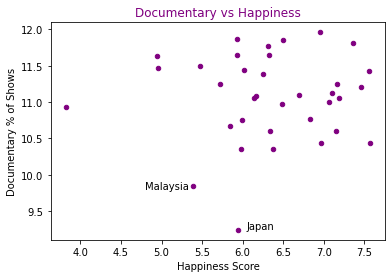

In [291]:
# plt.scatter(happiness_genre_df["Ladder Score"],happiness_genre_df["Doc_Percent"])
happiness_genre_df.plot(kind="scatter",x="Ladder Score",y="Doc_Percent",color="purple")
plt.xlabel("Happiness Score")
plt.ylabel("Documentary % of Shows")
plt.title("Documentary vs Happiness",color="purple")
plt.annotate("Japan",(6.05,9.25))
plt.annotate("Malaysia",(4.8,9.8))


# x=happiness_genre_df["Ladder Score"]
# y=happiness_genre_df['Doc_Percent']
# from scipy.stats import linregress
# (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
# regress_values = slope*x+intercept
# plt.plot(x,regress_values,color="red")
# plt.annotate(f"y = {round(slope,2)}x + {round(intercept,1)}",(4.2,10.8),color="red")
# print(f"R^2 value is {round(rvalue**2,4)}")

plt.savefig("doc.png")

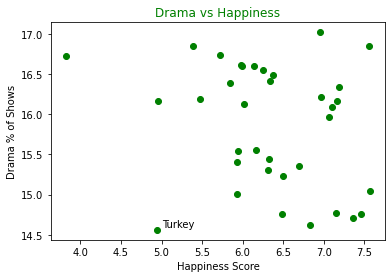

In [284]:
plt.scatter(happiness_genre_df["Ladder Score"],happiness_genre_df["Drama_Percent"],color="green")
plt.xlabel("Happiness Score")
plt.ylabel("Drama % of Shows")
plt.title("Drama vs Happiness",color="green")
plt.annotate("Turkey",(5,14.6))
# plt.annotate("France",(6.8,1.54))

plt.savefig("drama.png")

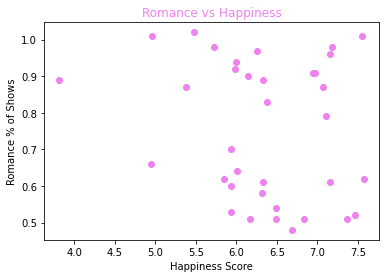

In [288]:
plt.scatter(happiness_genre_df["Ladder Score"],happiness_genre_df["Romance_Percent"],color="violet")
plt.xlabel("Happiness Score")
plt.ylabel("Romance % of Shows")
plt.title("Romance vs Happiness",color="violet")

plt.savefig("romance.png")

In [148]:
genre_count = genre_df.groupby("Genre").count()
genre_count.sort_values("Country",ascending=False)

,Country,Languages
Genre,,
Drama,48087,47412
Comedy,46287,44993
Drama,31044,30299
Thriller,30772,30519
Romance,27812,27425
Action,25076,24995
Documentary,21587,20275
Animation,21097,19736
Comedy,20825,19977
